In [ ]:
#对图像进行各种几个变换，例如移动，旋转，仿射变换等、
#OpenCV 提供了两个变换函数，cv2.warpAffine 和 cv2.warpPerspective，
#使用这两个函数你可以实现所有类型的变换

#cv2.warpAffine 接收的参数是2 × 3 的变换矩阵
#cv2.warpPerspective 接收的参数是 3 × 3 的变换矩阵。


In [ ]:
#扩展缩放

import cv2
import numpy as np

img=cv2.imread('messi5.jpg') 
# 下面的 None 本应该是输出图像的尺寸，但是因为后边我们设置了缩放因子
# 因此这里为 None
res=cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)

#OR
# 这里呢，我们直接设置输出图像的尺寸，所以不用设置缩放因子
# height,width=img.shape[:2]
# res=cv2.resize(img,(2*width,2*height),interpolation=cv2.INTER_CUBIC)

while(1):
    cv2.imshow('res',res)
    cv2.imshow('img',img)
    
    if cv2.waitKey(0) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [1]:
#平移

import numpy as np
import cv2 as cv

img = cv.imread('messi5.jpg',0)

rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])

dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
#旋转
#找到此转换矩阵，OpenCV提供了一个函数cv.getRotationMatrix2D

img = cv.imread('messi5.jpg',0)
rows,cols = img.shape
# cols-1 和 rows-1 是坐标限制
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

(<matplotlib.axes._subplots.AxesSubplot at 0x171fc789160>,
 Text(0.5,1,'Output'))

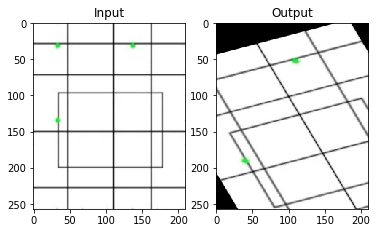

In [6]:
#仿射变换
#在仿射变换中，原始图像中的所有平行线在输出图像中仍将平行
import matplotlib.pyplot as plt

%matplotlib inline

img = cv.imread('drawing.png')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

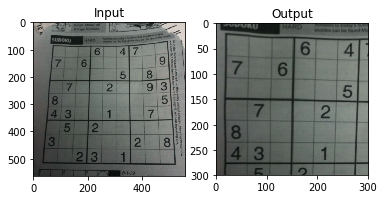

In [7]:
#透视变换

img = cv.imread('sudoku.png')

rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv.getPerspectiveTransform(pts1,pts2)

dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()